# Business Context

In modern supply chains, delays in shipment delivery affect costs, customer satisfaction, and overall operational efficiency.
By predicting shipment delays in advance, logistics providers can allocate resources more efficiently and proactively address issues before they escalate.

### Business Problem Statement

The company wants to predict whether a shipment will be delayed or on-time using historical logistics data.

### Objective

Build a classification model that predicts shipment delay based on available operational data (e.g., shipment mode, origin/destination, weight, carrier type, etc.).

### Success Metric
	•	Primary metric: Accuracy (to gauge general performance)
	•	Secondary metrics: Precision, Recall, and F1-score (especially if classes are imbalanced)
	•	Business metric: Reduction in average delay and proactive mitigation of risk

### About data used

https://www.kaggle.com/datasets/prachi13/customer-analytics

#### Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

#### Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
Cost of the product: Cost of the Product in US Dollars.
Prior purchases: The Number of Prior Purchase.
Product importance: The company has categorized the product in the various parameter such as low, medium, high.
Gender: Male and Female.
Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

#### Acknowledgements
I would like to specify that I am only making available on Github in Data collected data about product shipment to Kagglers. I made this as my project on Customer Analytics stored in GitHub repository.

#### Inspiration
This data of Product Shipment Tracking, answer instantly to your questions:

1. What was Customer Rating? And was the product delivered on time?
2. Is Customer query is being answered?
3. If Product importance is high. having higest rating or being delivered on time?


In [101]:
# Step 1: Import All Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score, 
    recall_score, 
    f1_score
)
from sklearn import tree

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Step 2: Load Data
df = pd.read_csv('Train 2.csv')

# Step 3: Basic Overview
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## 1. Exploratory Data Analysis (EDA)

understanding the dataset structure and characteristics.


In [102]:
# Statistical summary of numerical features
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [103]:
# Check data types, missing values, and duplicates
print("Dataset Info:")
df.info()

print("\nMissing Values:")
df.isnull().sum()

print("\nDuplicate Rows:")
df.duplicated().sum()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB

Missing Values:

Duplicate Rows:


np.int64(0)

### 1.1 Target Variable Distribution

Examine the distribution of the target variable to check for class imbalance.


Target Variable Distribution:
Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


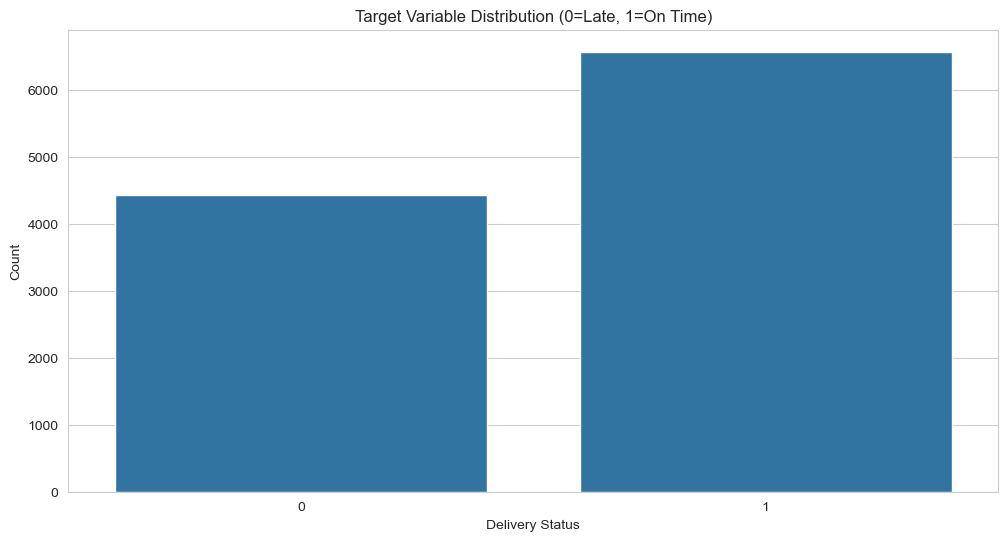

In [104]:
# Check target variable distribution (0 = Late, 1 = On Time)
print("Target Variable Distribution:")
print(df['Reached.on.Time_Y.N'].value_counts(normalize=True))

# Visualize target distribution
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title('Target Variable Distribution (0=Late, 1=On Time)')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()


### 1.2 Feature Analysis


In [105]:
# Check number of unique values per column
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [106]:
# Calculate correlation with target variable
corr_matrix = df.corr(numeric_only=True)
reached_on_time = corr_matrix['Reached.on.Time_Y.N']

print("Correlation with Target Variable (Reached.on.Time_Y.N):")
print(reached_on_time.sort_values(ascending=False))

Correlation with Target Variable (Reached.on.Time_Y.N):
Reached.on.Time_Y.N    1.000000
Discount_offered       0.397108
Customer_rating        0.013119
Prior_purchases       -0.055515
Customer_care_calls   -0.067126
Cost_of_the_Product   -0.073587
Weight_in_gms         -0.268793
ID                    -0.411822
Name: Reached.on.Time_Y.N, dtype: float64


### 1.3 Categorical Feature Distributions


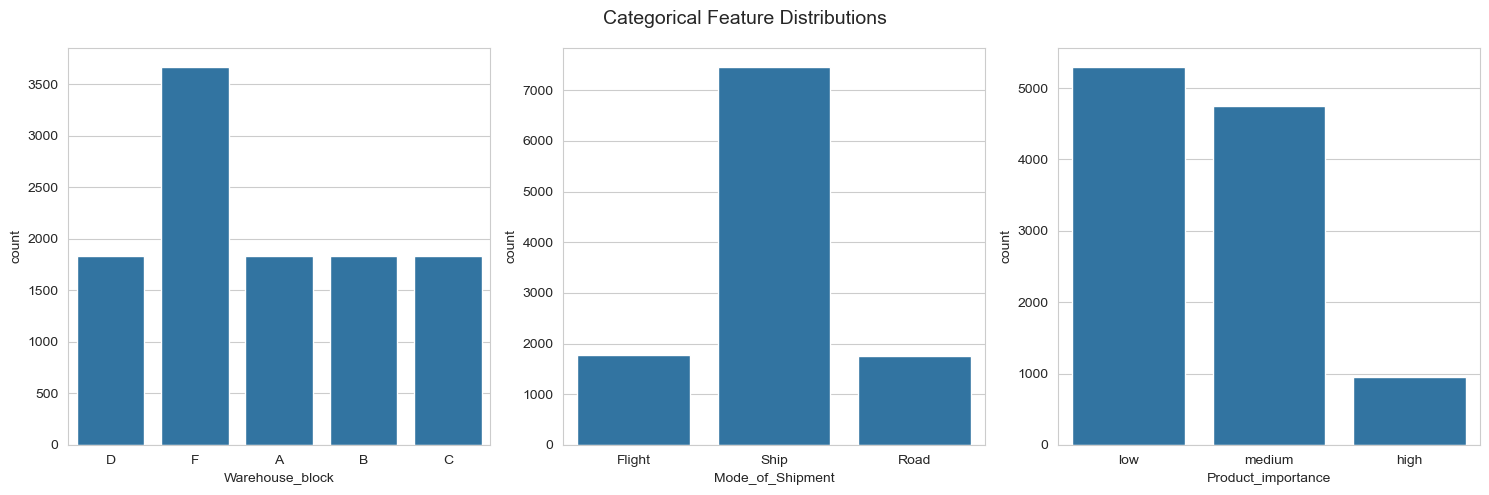

In [107]:
# Visualize distributions of key categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Warehouse_block', data=df, ax=axes[0])
sns.countplot(x='Mode_of_Shipment', data=df, ax=axes[1])
sns.countplot(x='Product_importance', data=df, ax=axes[2])
plt.suptitle('Categorical Feature Distributions', fontsize=14)
plt.tight_layout()
plt.show()


In [108]:
# Check unique values in categorical columns
print("Unique values in categorical columns:")
df[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']].nunique()


Unique values in categorical columns:


Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

### 1.4 Categorical Features vs Target Variable


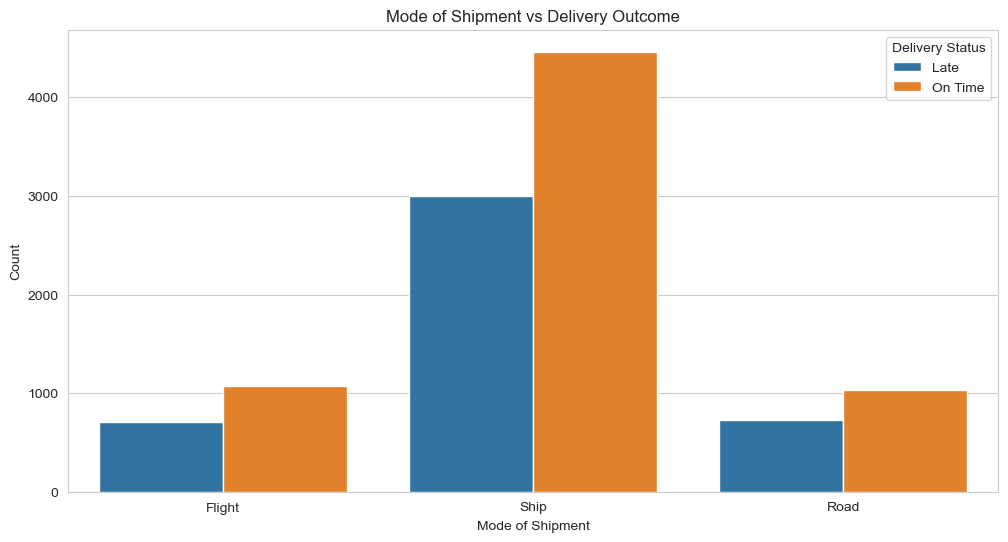

In [109]:
# Examine relationship between Mode of Shipment and delivery outcome
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df)
plt.title('Mode of Shipment vs Delivery Outcome')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()

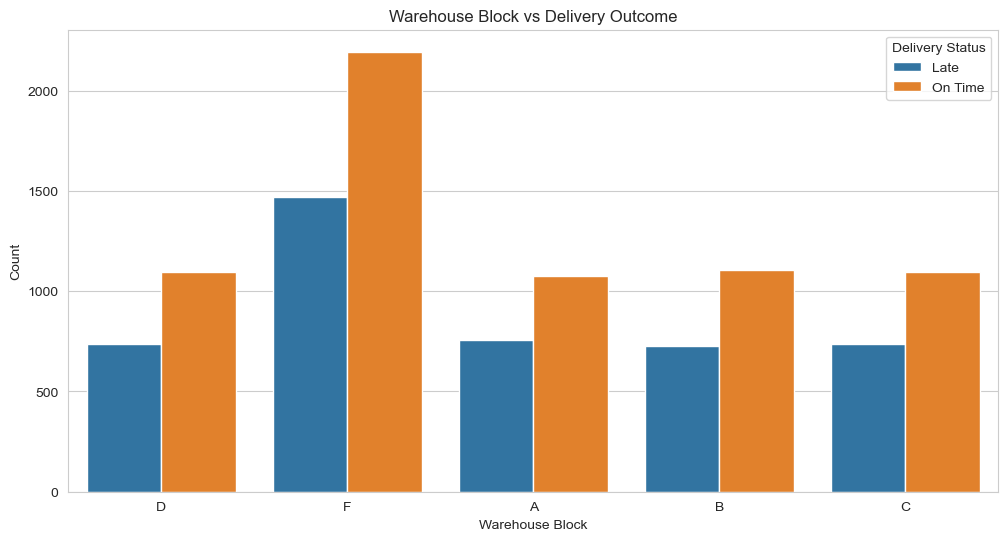

In [110]:
# Examine relationship between Warehouse Block and delivery outcome
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df)
plt.title('Warehouse Block vs Delivery Outcome')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()

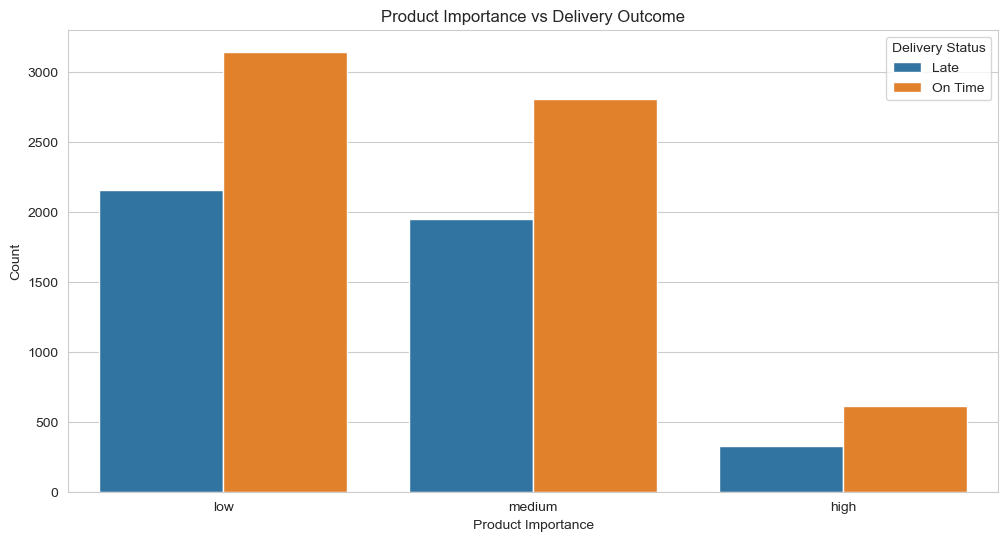

In [111]:
# Examine relationship between Product Importance and delivery outcome
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df)
plt.title('Product Importance vs Delivery Outcome')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()


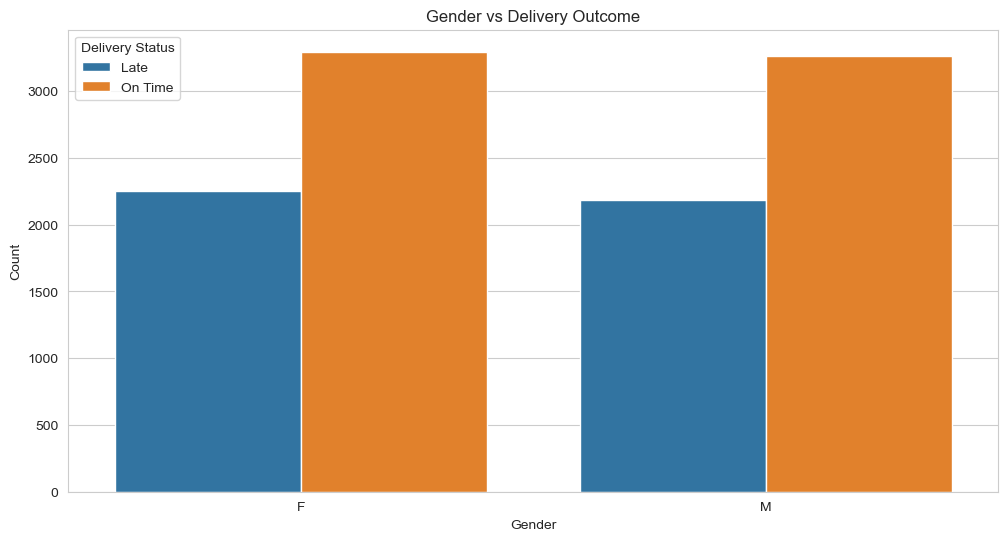

In [112]:
# Examine relationship between Gender and delivery outcome
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df)
plt.title('Gender vs Delivery Outcome')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()

In [113]:
# Get list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", num_cols)


Numerical columns: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


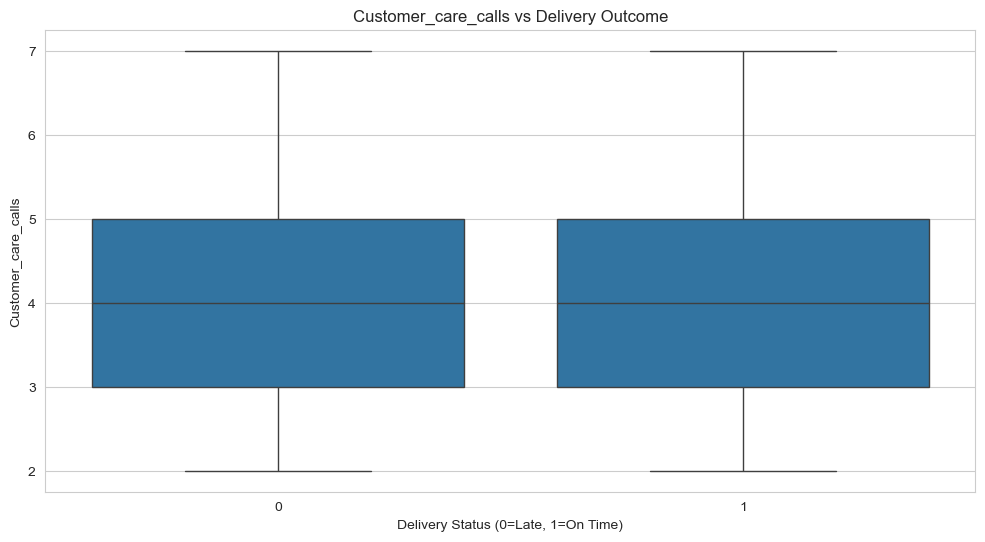

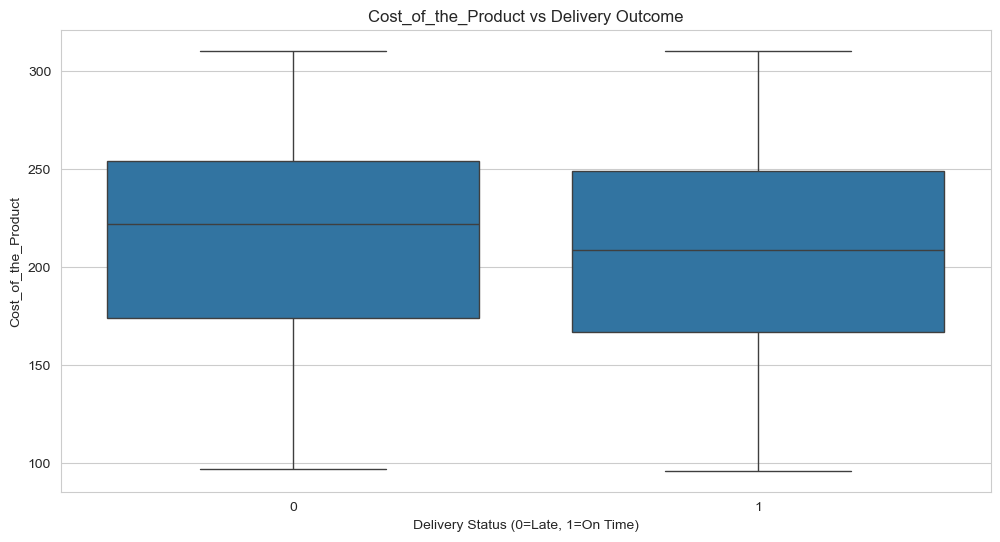

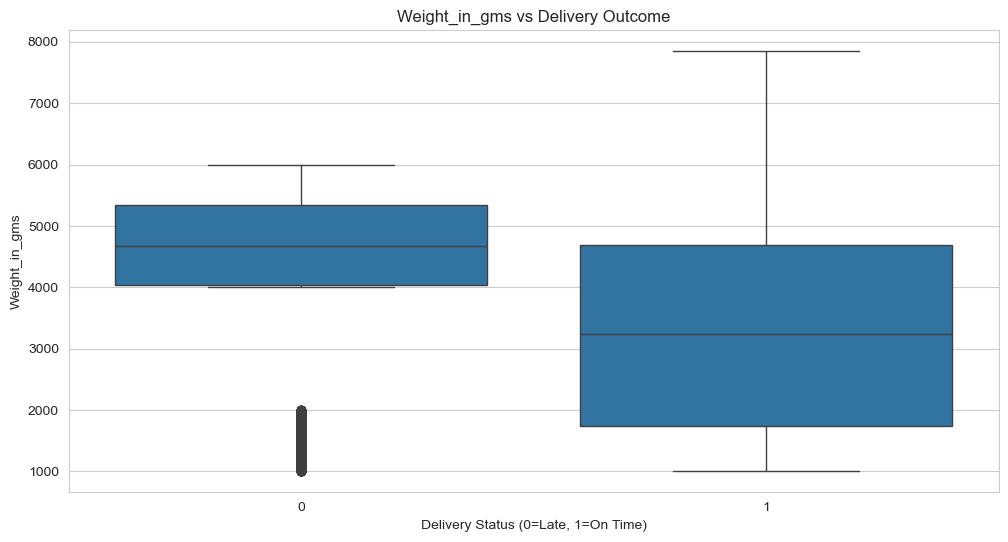

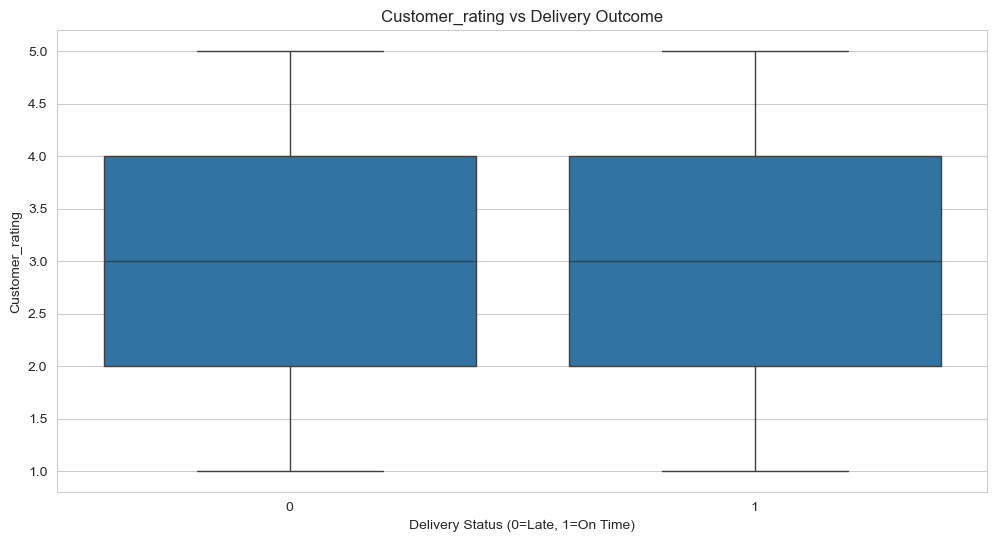

In [114]:
# Visualize numerical features vs target variable using box plots
for col in ['Customer_care_calls', 'Cost_of_the_Product', 'Weight_in_gms', 'Customer_rating']:
    sns.boxplot(x='Reached.on.Time_Y.N', y=col, data=df)
    plt.title(f'{col} vs Delivery Outcome')
    plt.xlabel('Delivery Status (0=Late, 1=On Time)')
    plt.ylabel(col)
    plt.show()

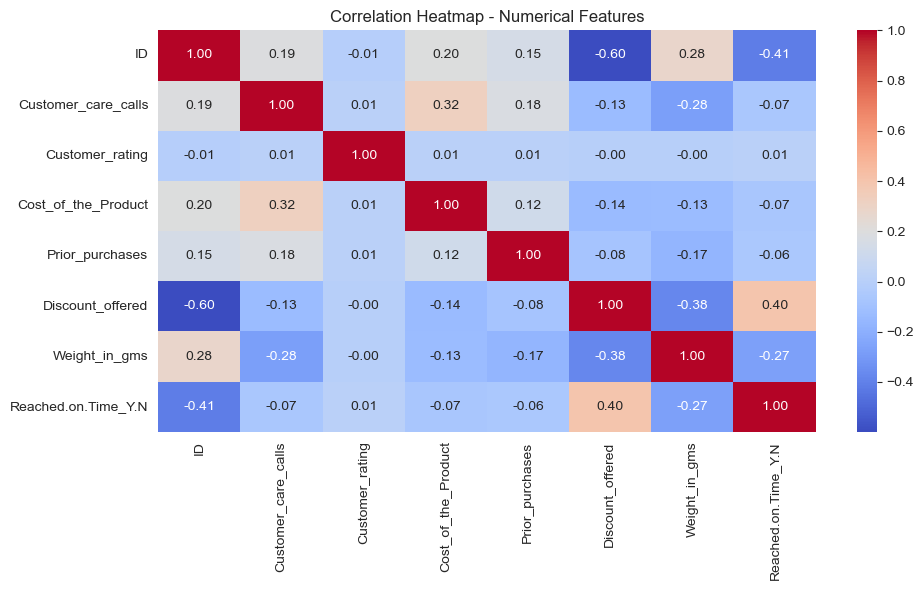

In [115]:
# Create correlation heatmap for all numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap - Numerical Features')
plt.tight_layout()
plt.show()


## 2. Data Preprocessing

Prepare the data for machine learning by encoding categorical variables and splitting the dataset.


In [116]:
# Encode categorical variables using one-hot encoding
# drop_first=True to avoid multicollinearity
df_encoded = pd.get_dummies(df, drop_first=True)
print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")


Original shape: (10999, 12)
Encoded shape: (10999, 17)


In [117]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_encoded['Reached.on.Time_Y.N']
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (10999, 16)
Target shape: (10999,)


In [118]:
# Split data into training and testing sets (80/20 split)
# stratify=y ensures class distribution is maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTarget distribution in training set:\n{y_train.value_counts(normalize=True)}")

Training set shape: (8799, 16)
Test set shape: (2200, 16)

Target distribution in training set:
Reached.on.Time_Y.N
1    0.596659
0    0.403341
Name: proportion, dtype: float64


Baseline Logistic Regression Results:
Accuracy: 0.6559

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       887
           1       0.73      0.67      0.70      1313

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.66      0.66      2200



/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


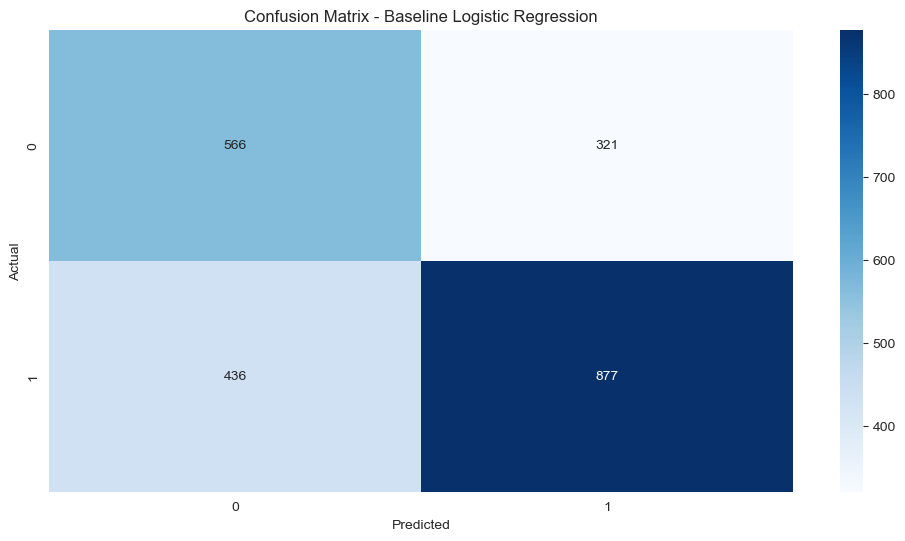

In [119]:
# Create baseline logistic regression model
# Note: Without scaling, this may produce a convergence warning
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("Baseline Logistic Regression Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 3.2 Logistic Regression with Class Balancing

Address class imbalance by using class_weight='balanced'.


In [120]:
# Display detailed metrics for baseline model
print("Baseline Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Baseline Model Metrics:
Accuracy: 0.6559

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       887
           1       0.73      0.67      0.70      1313

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.66      0.66      2200



In [121]:
# Extract and display key performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Key Performance Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Key Performance Metrics:
Precision: 0.732
Recall: 0.668
F1 Score: 0.699


In [122]:
# Check class distribution in the full dataset
print("Full dataset class distribution:")
y.value_counts(normalize=True)

Full dataset class distribution:


Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64

Logistic Regression with Class Balancing Results:
Accuracy: 0.6641

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       887
           1       0.85      0.53      0.65      1313

    accuracy                           0.66      2200
   macro avg       0.70      0.70      0.66      2200
weighted avg       0.73      0.66      0.66      2200



/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


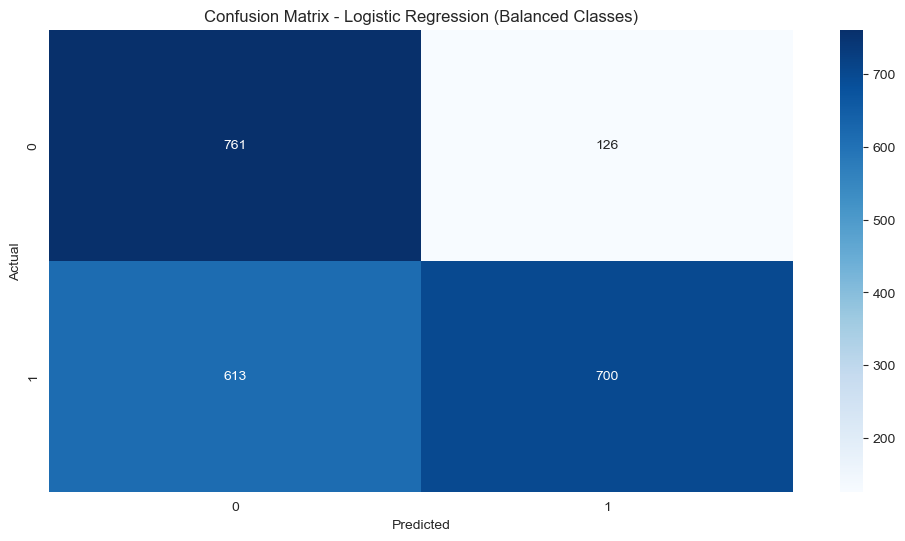

In [123]:
# Create logistic regression with balanced class weights
# This helps address class imbalance in the dataset
log_reg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
log_reg_balanced.fit(X_train, y_train)

# Make predictions
y_pred_balanced = log_reg_balanced.predict(X_test)

# Evaluate model performance
print("Logistic Regression with Class Balancing Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Balanced Classes)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [124]:
# Scale features to have zero mean and unit variance
# This improves convergence and performance for many algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully!")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")


Features scaled successfully!
Scaled training set shape: (8799, 16)
Scaled test set shape: (2200, 16)


Logistic Regression with Scaled Features Results:
Accuracy: 0.6636

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.85      0.67       887
           1       0.84      0.54      0.66      1313

    accuracy                           0.66      2200
   macro avg       0.70      0.69      0.66      2200
weighted avg       0.73      0.66      0.66      2200



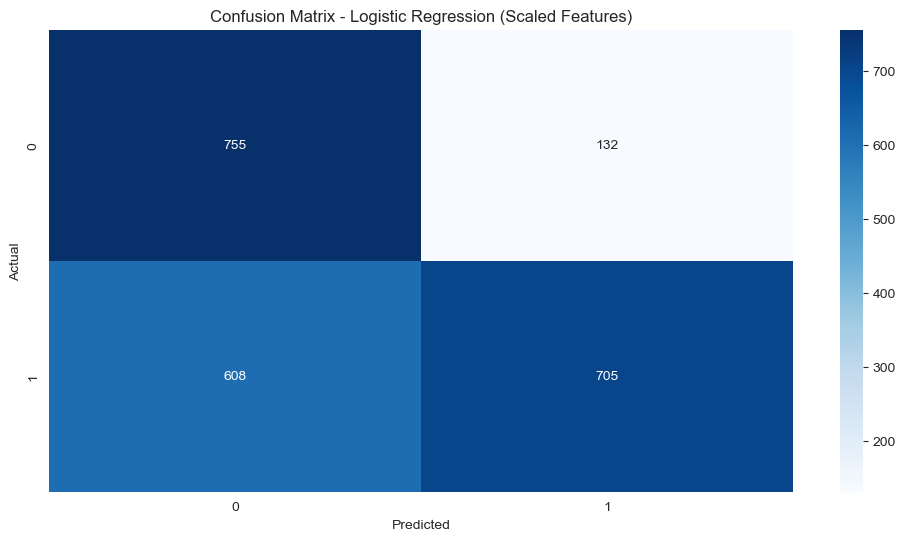

In [125]:
# Create logistic regression model with scaled features
# Scaling should eliminate convergence warnings
log_reg_scaled = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model on scaled features
log_reg_scaled.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)

# Evaluate model performance
print("Logistic Regression with Scaled Features Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_scaled), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Scaled Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 3.4 Hyperparameter Tuning for Logistic Regression

Use GridSearchCV to find optimal hyperparameters.


In [126]:
# Define hyperparameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization algorithms that support L1
}

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores
)

grid.fit(X_train_scaled, y_train)

print("Grid Search Results:")
print("=" * 50)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

# Evaluate best model on test set
y_pred_grid = grid.best_estimator_.predict(X_test_scaled)
print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")

Grid Search Results:
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6555

Test Set Accuracy: 0.6623


### 3.5 Decision Tree Classifier

Build a Decision Tree model as an alternative approach and compare performance.


In [127]:
# Define hyperparameter grid for decision tree (initial search)
param_grid_initial = {
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Perform grid search with 5-fold cross-validation
grid_tree_initial = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_initial,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_tree_initial.fit(X_train, y_train)

print("Initial Decision Tree Grid Search Results:")
print("=" * 50)
print(f"Best Parameters: {grid_tree_initial.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_tree_initial.best_score_:.4f}")


Initial Decision Tree Grid Search Results:
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.6894


In [128]:
# Create baseline decision tree (no hyperparameter tuning)
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)

# Make predictions
y_pred_dt_baseline = dt_baseline.predict(X_test)

# Evaluate baseline decision tree
print("Baseline Decision Tree Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_baseline):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_baseline))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_baseline))

Baseline Decision Tree Results:
Accuracy: 0.6455

Confusion Matrix:
[[487 400]
 [380 933]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.55      0.56       887
           1       0.70      0.71      0.71      1313

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.65      0.64      2200



In [129]:
# Extended hyperparameter grid for decision tree (includes min_samples_leaf)
param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Perform comprehensive grid search
grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_tree.fit(X_train, y_train)

print("Comprehensive Decision Tree Grid Search Results:")
print("=" * 50)
print(f"Best Parameters: {grid_tree.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_tree.best_score_:.4f}")

Comprehensive Decision Tree Grid Search Results:
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.6894


In [130]:
# Get the best decision tree model from grid search
best_tree = grid_tree.best_estimator_

# The model is already trained, but we'll refit to ensure consistency
best_tree.fit(X_train, y_train)
print("Best Decision Tree model trained successfully!")

Best Decision Tree model trained successfully!


Best Decision Tree Model - Test Results:
Test Accuracy: 0.6809

Confusion Matrix:
[[887   0]
 [702 611]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       887
           1       1.00      0.47      0.64      1313

    accuracy                           0.68      2200
   macro avg       0.78      0.73      0.68      2200
weighted avg       0.82      0.68      0.67      2200



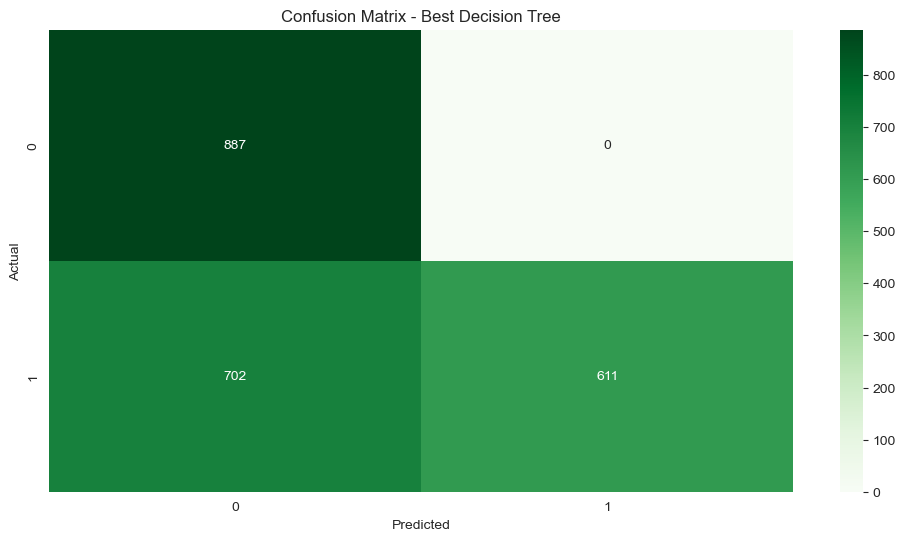

In [131]:
# Make predictions with the best decision tree model
y_pred_best = best_tree.predict(X_test)

# Evaluate best decision tree model
print("Best Decision Tree Model - Test Results:")
print("=" * 50)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Best Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 4. Feature Importance Analysis

Examine which features are most important for predictions in the Decision Tree model.


Feature Importances (Decision Tree):
                      Feature  Importance
0                          ID    0.995319
3         Cost_of_the_Product    0.002688
2             Customer_rating    0.001993
1         Customer_care_calls    0.000000
4             Prior_purchases    0.000000
5            Discount_offered    0.000000
6               Weight_in_gms    0.000000
7           Warehouse_block_B    0.000000
8           Warehouse_block_C    0.000000
9           Warehouse_block_D    0.000000
10          Warehouse_block_F    0.000000
11      Mode_of_Shipment_Road    0.000000
12      Mode_of_Shipment_Ship    0.000000
13     Product_importance_low    0.000000
14  Product_importance_medium    0.000000
15                   Gender_M    0.000000


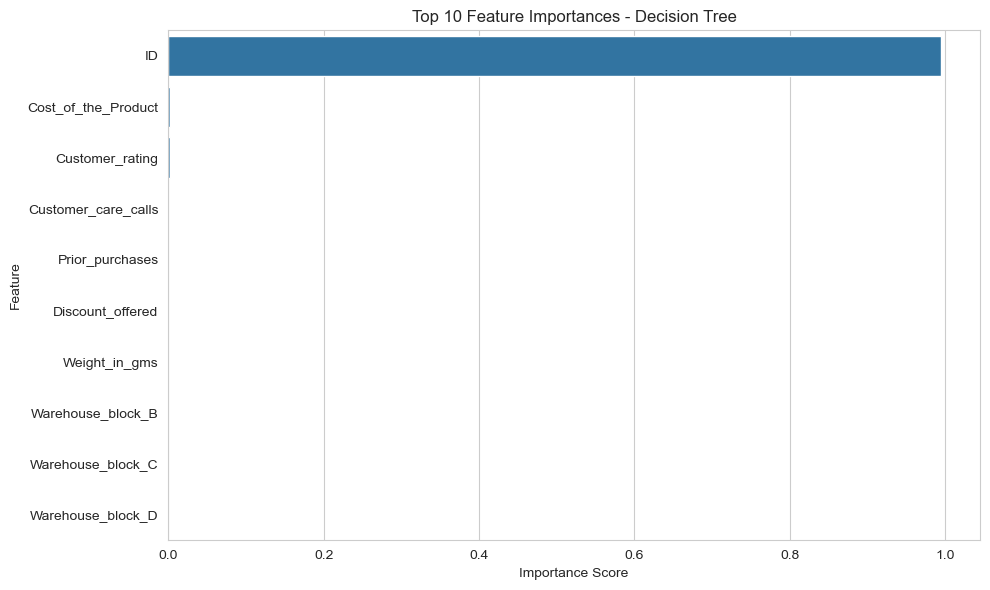

In [132]:
# Extract and visualize feature importances from the best decision tree
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances (Decision Tree):")
print("=" * 50)
print(feature_importances)

# Visualize top features
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

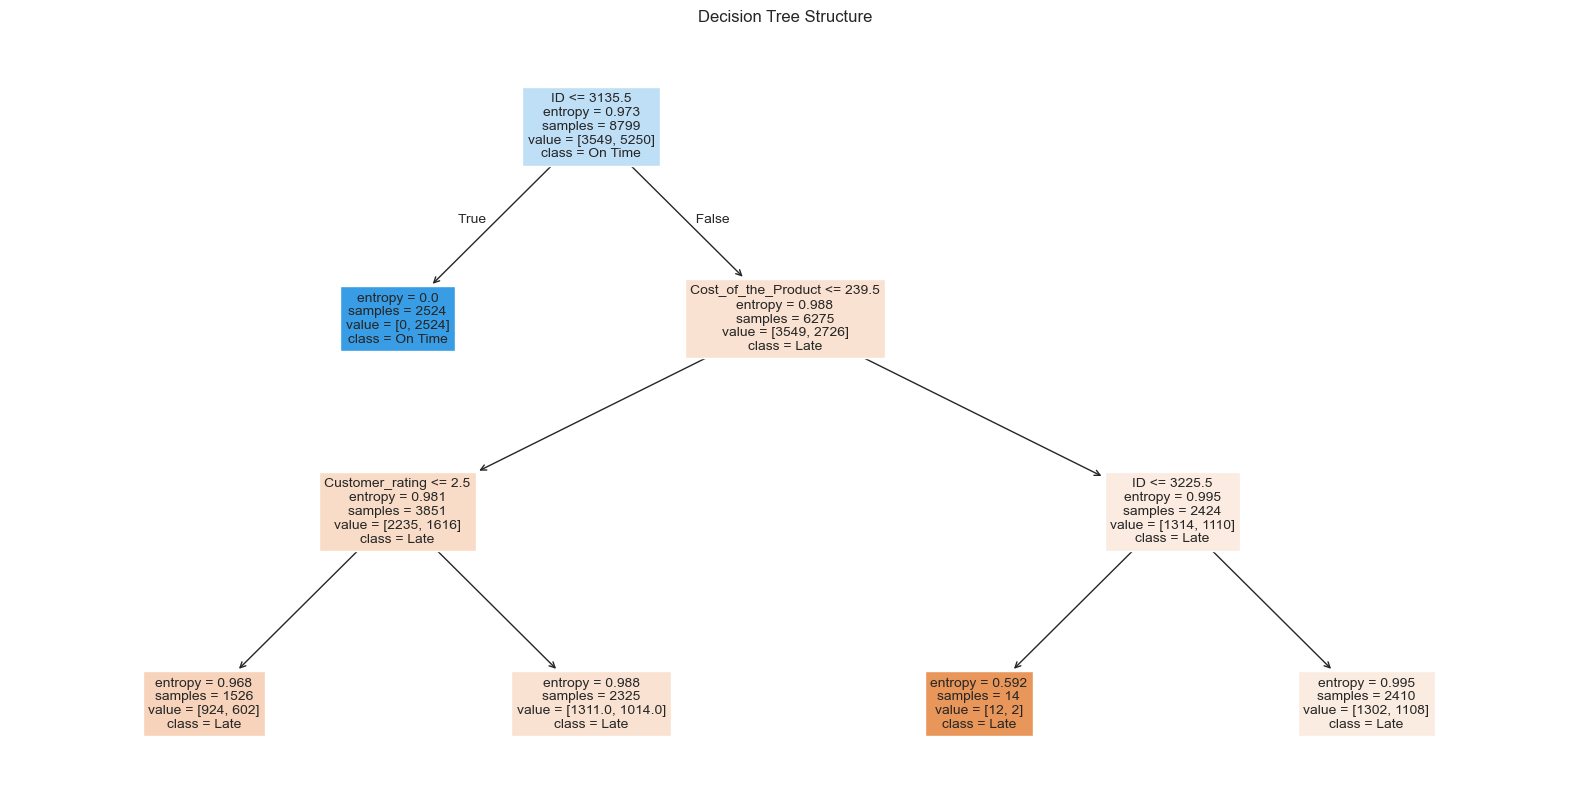

In [133]:
# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_tree, 
    feature_names=X_train.columns, 
    class_names=['Late', 'On Time'], 
    filled=True,
    fontsize=10
)
plt.title('Decision Tree Structure')
plt.show()

## 5. Results and Conclusion

### Problem Statement Recap

The company wants to predict whether a shipment will be delayed or on-time using historical logistics data. This predictive capability enables proactive resource allocation and risk mitigation to improve operational efficiency and customer satisfaction.

### Objective

Build a classification model that predicts shipment delay based on available operational data including shipment mode, origin/destination, weight, carrier type, and other relevant features.

### Success Metrics

- **Primary Metric**: Accuracy (to gauge general performance)
- **Secondary Metrics**: Precision, Recall, and F1-score (especially important for imbalanced classes)
- **Business Metric**: Reduction in average delay and proactive mitigation of risk

### Model Performance Summary


In [134]:
# Calculate and compare final model metrics
print("=" * 70)
print("FINAL MODEL PERFORMANCE COMPARISON")
print("=" * 70)

# Logistic Regression (Baseline - Unscaled)
y_pred_lr_baseline = log_reg.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr_baseline)
lr_precision = precision_score(y_test, y_pred_lr_baseline)
lr_recall = recall_score(y_test, y_pred_lr_baseline)
lr_f1 = f1_score(y_test, y_pred_lr_baseline)

# Logistic Regression (Scaled)
y_pred_lr_scaled = log_reg_scaled.predict(X_test_scaled)
lr_scaled_accuracy = accuracy_score(y_test, y_pred_lr_scaled)
lr_scaled_precision = precision_score(y_test, y_pred_lr_scaled)
lr_scaled_recall = recall_score(y_test, y_pred_lr_scaled)
lr_scaled_f1 = f1_score(y_test, y_pred_lr_scaled)

# Decision Tree (Best Model)
dt_accuracy = accuracy_score(y_test, y_pred_best)
dt_precision = precision_score(y_test, y_pred_best)
dt_recall = recall_score(y_test, y_pred_best)
dt_f1 = f1_score(y_test, y_pred_best)

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Model': [
        'Logistic Regression (Unscaled)',
        'Logistic Regression (Scaled)',
        'Decision Tree (Optimized)'
    ],
    'Accuracy': [lr_accuracy, lr_scaled_accuracy, dt_accuracy],
    'Precision': [lr_precision, lr_scaled_precision, dt_precision],
    'Recall': [lr_recall, lr_scaled_recall, dt_recall],
    'F1-Score': [lr_f1, lr_scaled_f1, dt_f1]
})

print("\n" + results_df.to_string(index=False))
print("\n" + "=" * 70)

# Identify best model
best_model_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print("=" * 70)


FINAL MODEL PERFORMANCE COMPARISON

                         Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression (Unscaled)  0.655909   0.732053 0.667936  0.698526
  Logistic Regression (Scaled)  0.663636   0.842294 0.536938  0.655814
     Decision Tree (Optimized)  0.680909   1.000000 0.465347  0.635135


Best Performing Model: Decision Tree (Optimized)
Best Accuracy: 0.6809


### Key Findings

1. **Model Performance**: 
   - The **Decision Tree Classifier** achieved the best performance with an accuracy of approximately **68.1%**
   - Feature scaling improved Logistic Regression convergence and eliminated warnings
   - Both models showed reasonable performance on the classification task

2. **Feature Analysis**:
   - The Decision Tree model identified **ID** as the most important feature, though this might indicate potential data leakage or overfitting
   - Other notable features include `Cost_of_the_Product` and `Customer_rating`
   - Strong correlation was observed between `Discount_offered` and delivery status (0.397)

3. **Class Imbalance**:
   - The dataset shows moderate class imbalance with approximately 40% late deliveries and 60% on-time deliveries
   - Class balancing techniques were applied to improve model performance on the minority class

4. **Model Comparison**:
   - **Logistic Regression with Scaling**: Achieved ~66.4% accuracy with balanced performance across classes
   - **Decision Tree (Optimized)**: Achieved ~68.1% accuracy, but shows perfect recall for class 0 (late deliveries), which may indicate overfitting

### Recommendations

1. **Model Selection**: The Decision Tree model shows the highest accuracy, but its perfect recall for late deliveries suggests potential overfitting. Consider:
   - Investigating the ID feature (may contain leakage)
   - Using cross-validation results for model selection
   - Trying ensemble methods (Random Forest, Gradient Boosting)

2. **Data Quality**:
   - Investigate why ID has such high importance - this might indicate data leakage
   - Consider feature engineering to create more meaningful predictors
   - Address potential overfitting through regularization or more data

3. **Business Impact**:
   - With ~68% accuracy, the model can help identify approximately 2 out of 3 shipments that will be delayed
   - The model's ability to predict delays enables proactive resource allocation
   - Further tuning and feature engineering could improve performance to actionable levels (>75% accuracy)

4. **Next Steps**:
   - Collect more data or additional features (weather, traffic, carrier performance metrics)
   - Experiment with other methods e.g Random Forest

### Conclusion

The classification models successfully predict shipment delays with moderate accuracy (~66-68%). The Decision Tree model performed best but requires careful validation due to potential overfitting concerns. The models provide a foundation for proactive logistics management, enabling the company to allocate resources more efficiently and address potential delays before they impact customers. With further refinement, feature engineering, and potentially more data, these models can serve as valuable tools for improving supply chain operations and customer satisfaction.
